In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!jupyter nbextension enable --py widgetsnbextension
from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler, MinMaxScaler,  LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, KFold
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from lineartree import LinearForestRegressor
from sklearn.inspection import permutation_importance

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [2]:
ap = pd.read_csv('../01. Dataset/Air Pollution.csv')
ap.head()

,Country Name,City,Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Updated Year
0,Afghanistan,Kabul,2019,119.77,NaN,NaN,18.0,NaN,NaN,2022
1,Albania,Durres,2015,NaN,17.65,26.63,NaN,NaN,83.961187,2022
2,Albania,Durres,2016,14.32,24.56,24.78,NaN,NaN,87.932605,2022
3,Albania,Elbasan,2015,NaN,NaN,23.96,NaN,NaN,97.853881,2022
4,Albania,Elbasan,2016,NaN,NaN,26.26,NaN,NaN,96.049636,2022


In [3]:
ap.isnull().sum()

Country Name                      0
City                              0
Year                              0
PM2.5 (μg/m3)                 17143
PM10 (μg/m3)                  11082
NO2 (μg/m3)                    9991
PM25 temporal coverage (%)    24916
PM10 temporal coverage (%)    26810
NO2 temporal coverage (%)     12301
Updated Year                      0
dtype: int64

In [4]:
ap.describe()

,Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Updated Year
count,32191.000000,15048.000000,21109.000000,22200.000000,7275.000000,5381.000000,19890.000000,32191.000000
mean,2015.579354,22.920320,30.533252,20.619336,90.794096,90.583500,93.696804,2021.744214
std,2.752654,17.925906,29.312756,12.133388,14.872681,13.816311,10.451751,1.051897
min,2000.000000,0.010000,1.040000,0.000000,0.000000,2.568493,1.923077,2016.000000
25%,2014.000000,10.350000,16.980000,12.000000,88.595890,87.945205,93.207763,2022.000000
50%,2016.000000,16.000000,22.000000,18.800000,97.000000,96.039000,96.369863,2022.000000
75%,2018.000000,31.000000,31.300000,27.160000,99.000000,98.938000,98.926941,2022.000000
max,2021.000000,191.900000,540.000000,210.680000,100.000000,100.000000,100.000000,2022.000000


In [5]:
ap_s = ap.loc[:, ['Country Name', 'City', 'Year', 'PM2.5 (μg/m3)', 'PM10 (μg/m3)']]
ap_s = ap_s.rename(columns = {
    'Country Name': 'Country',
    'Year': 'Year',
    'PM2.5 (μg/m3)': 'PM2.5',
    'PM10 (μg/m3)': 'PM10',
})
ap_s.isnull().sum()

Country        0
City           0
Year           0
PM2.5      17143
PM10       11082
dtype: int64

In [6]:
ap_s = ap_s.dropna(how='any', subset=['PM2.5', 'PM10'], axis=0)
ap_s.isnull().sum()

Country    0
City       0
Year       0
PM2.5      0
PM10       0
dtype: int64

In [7]:
dp = pd.read_csv('../01. Dataset/death-rates-from-air-pollution.csv')
dp.head()

,Entity,Code,Year,Deaths - Air pollution - Sex: Both - Age: Age-standardized (Rate),Deaths - Household air pollution from solid fuels - Sex: Both - Age: Age-standardized (Rate),Deaths - Ambient particulate matter pollution - Sex: Both - Age: Age-standardized (Rate),Deaths - Ambient ozone pollution - Sex: Both - Age: Age-standardized (Rate)
0,Afghanistan,AFG,1990,299.477309,250.362910,46.446589,5.616442
1,Afghanistan,AFG,1991,291.277967,242.575125,46.033841,5.603960
2,Afghanistan,AFG,1992,278.963056,232.043878,44.243766,5.611822
3,Afghanistan,AFG,1993,278.790815,231.648134,44.440148,5.655266
4,Afghanistan,AFG,1994,287.162923,238.837177,45.594328,5.718922


In [8]:
dp_s = dp.loc[:, ['Entity', 'Year',
                  'Deaths - Air pollution - Sex: Both - Age: Age-standardized (Rate)',
                  'Deaths - Ambient particulate matter pollution - Sex: Both - Age: Age-standardized (Rate)']]
dp_s = dp_s.rename(columns = {
    'Entity': 'Country',
    'Deaths - Air pollution - Sex: Both - Age: Age-standardized (Rate)': 'TotalDeaths',
    'Deaths - Ambient particulate matter pollution - Sex: Both - Age: Age-standardized (Rate)': 'PMDeaths',
})
dp_s.isnull().sum()

Country        0
Year           0
TotalDeaths    0
PMDeaths       0
dtype: int64

In [9]:
dp_sg = dp_s.groupby(['Country', 'Year'])
dp_sg.agg({'TotalDeaths':'mean', 'PMDeaths':'mean'}).head()

TotalDeaths   PMDeaths
Country     Year                        
Afghanistan 1990   299.477309  46.446589
            1991   291.277967  46.033841
            1992   278.963056  44.243766
            1993   278.790815  44.440148
            1994   287.162923  45.594328

In [10]:
ap_sf = ap_s.merge(dp_s)
ap_sf.isnull().sum()

Country        0
City           0
Year           0
PM2.5          0
PM10           0
TotalDeaths    0
PMDeaths       0
dtype: int64

In [11]:
ap_sg = ap_sf.groupby(['Country', 'Year'])
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#ap_sc.loc[(ap_s['Country'] == 'Australia') & (ap_s['Year'] == 2013)] # For validation
final_df = ap_sg.agg({'PM2.5':'mean', 'PM10':'mean', 'TotalDeaths':'mean', 'PMDeaths':'mean', 'City':'size'})
final_df.rename(columns={'City':'CitiesCount'}, inplace=True)

In [12]:
# final_df.to_csv('../01. Dataset/cleaned_dataset.csv')


In [13]:
profile = ProfileReport(final_df.iloc[:, [0,1,3]], title="Air Pollution Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

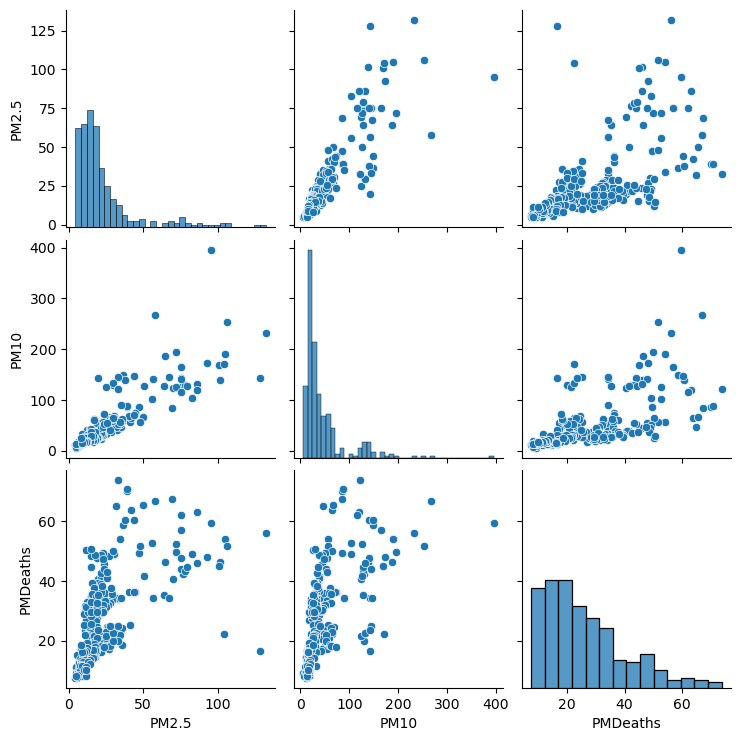

In [14]:
sns.pairplot(final_df.iloc[:, [0,1,3]])
plt.show()



In [15]:
scoring = [
    "neg_mean_absolute_error",
    "neg_mean_absolute_percentage_error",
    "neg_mean_squared_error",
    "neg_root_mean_squared_error",
    "r2"
]
train_frac = 0.90
target_columns = [0, 1, 3, 6, 2, 5]
categorical_columnns = [0, 1]
r_states = [ 1 ]

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [162]:
data = final_df.reset_index()
data = data.iloc[:, target_columns]
# data # Final input dataset

In [17]:
def clean_dataset(dataset, plot=False, remove_ol=False, rs=None, print_f=False):
    X = dataset[dataset.columns[:-1]].values # X origin is first columns
    y = dataset[dataset.columns[-1]].values  # y origin is last single column
    X_i, y_i = X, y
    ol = []

    # Convert 'Country' column to label so that it can be used on Regression
    for i in categorical_columnns:
        X[:,i] = LabelEncoder().fit_transform(X[:,i])

    if plot:
        fig, ax = plt.subplots(2, 2,figsize=[12, 12])
        ax[0, 0].set_title("Data before Standardization")
        ax[0, 0].hist(X, bins=50, orientation="vertical", label=dataset.columns[:-1].values.tolist())
        ax[1, 0].set_title("Data with OutLiers")
        ax[1, 0].scatter(X[:,-1], y[:])
        ax[0, 0].set_xlabel('Values')
        ax[0, 0].set_ylabel('Frequency')
        ax[0, 0].legend()
      

    # Remove Out-Liers
    if remove_ol:
        olf = LocalOutlierFactor()
        #olf = IsolationForest(random_state=rs)
        ol = olf.fit_predict(X)
        mask = (ol != -1)
        if print_f:
            print(mask.sum(), X.shape, mask.sum() / X.shape[0])
        X, y = X[mask, :], y[mask]

    X = StandardScaler().fit_transform(X, y)

    if plot:
        ax[0, 1].set_title("Data after Standardization")
        ax[0, 1].hist(X, bins=50, orientation="vertical", label=dataset.columns[:-1].values.tolist())
        mask = (ol == -1)
        ax[1, 1].set_title("Data without OutLiers")
        ax[1, 1].scatter(X_i[:,-1], y_i)
        ax[1, 1].scatter(X_i[mask,-1], y_i[mask], color='r')
        ax[0, 1].set_xlabel('Values')
        ax[0, 1].set_ylabel('Frequency')
        ax[0, 1].legend() 
        

    data = pd.DataFrame(np.hstack((X, np.reshape(y, (-1, 1)))))
    return data, X, y

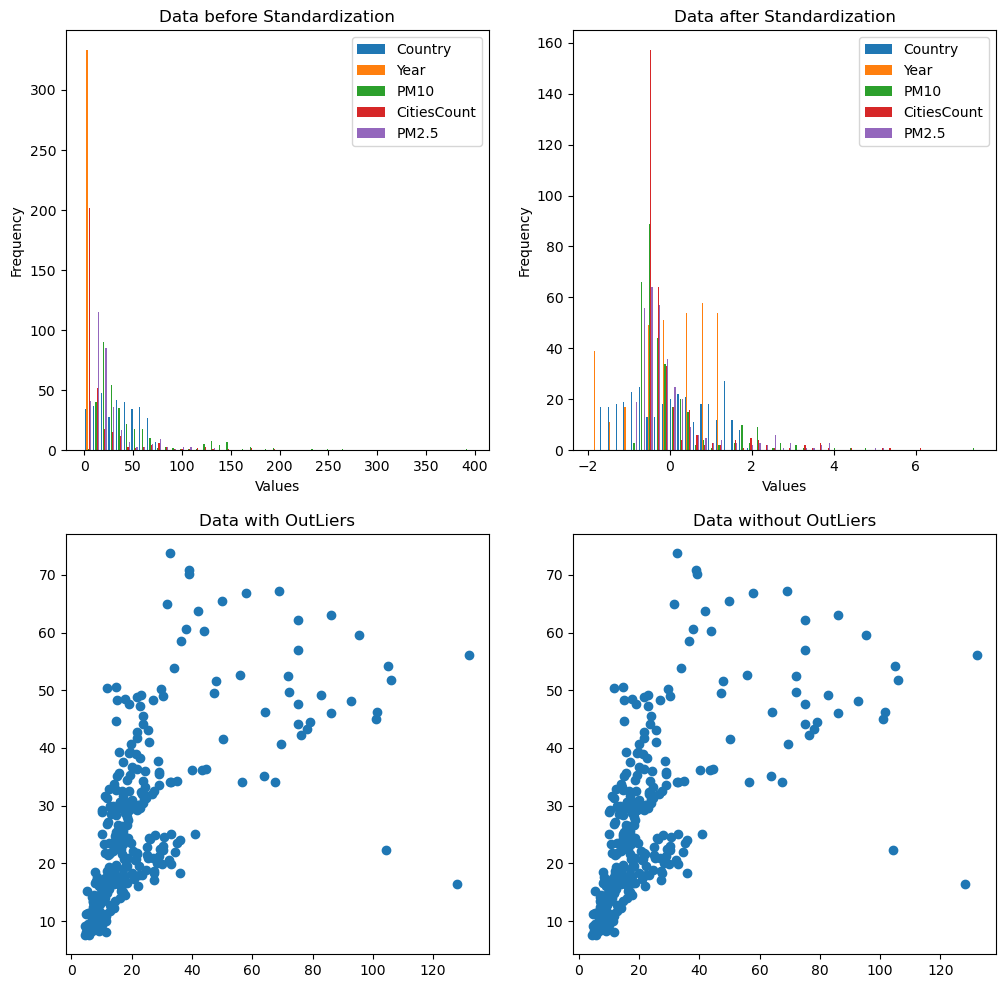

In [18]:
graph = clean_dataset(data, plot=True)
plt.show()

In [19]:
def get_dataset(dataframe, rs=None):
    #ovdf = dataframe.sample(frac=1, random_state=rs)
    #train, test = np.split(ovdf, [int(train_frac*len(ovdf))])
    
    train, test = train_test_split(dataframe, train_size=train_frac, random_state=rs)
    
    train, X_train, y_train = clean_dataset(train, remove_ol=False, rs=rs)
    test, X_test, y_test = clean_dataset(test, remove_ol=False, rs=rs)

    return X_train, y_train, X_test, y_test

In [51]:
global_results = []
for kfolds in range(2, 20):
    for rs in r_states:
        models = [
            # List of models to cross validate
            # Note all of hyper-parameters are fixed, just random_state is changed between trials
            ("linear", LinearRegression()),
            ("ridge", Ridge(random_state=rs)),
            ("lasso", Lasso(random_state=rs)),
            ("knn", KNeighborsRegressor()),
            ("mlp", MLPRegressor(max_iter=3000, random_state=rs)),
            ("for", RandomForestRegressor(random_state=rs)),
            ("for_ls", LinearForestRegressor(Lasso(random_state=rs), random_state=rs, max_features=None)),
            ("for_li", LinearForestRegressor(LinearRegression(), random_state=rs, max_features=None)),
            ("for_ri", LinearForestRegressor(Ridge(random_state=rs), random_state=rs, max_features=None)),
            ("gbr", GradientBoostingRegressor(random_state=rs)),
            ("xgb", XGBRegressor(random_state=rs))
            
        ]

        for regr_n, regr in models:
            # Get the dataset
            X_train, y_train, _, _ = get_dataset(data, rs=rs)
            # Cross validate the model
            kf = KFold(kfolds, shuffle=True, random_state=rs)
            cv = cross_validate(regr, X_train, y_train, scoring=scoring, cv=kf, return_train_score=True)
            # Save score of model for future reference
            for k, v in cv.items():
                for v_i in v:
                    global_results.append({
                        "regr_n": regr_n,
                        "kfolds": kfolds,
                        k: v_i,
                        "random_state": rs,
                        "model": regr,
                    })

# Final results
len(global_results)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multil

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multil

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multil

24948

In [164]:
gr_df = pd.DataFrame.from_dict(global_results)
gr_df_abs= gr_df.groupby(['regr_n', 'kfolds']).agg({
    'train_neg_mean_absolute_error': lambda x : abs(x.mean()),
    'test_neg_mean_absolute_error': lambda x : abs(x.mean()),
    'train_neg_mean_absolute_percentage_error': lambda x : abs(x.mean()),
    'test_neg_mean_absolute_percentage_error': lambda x : abs(x.mean()),
    'train_neg_mean_squared_error': lambda x : abs(x.mean()),
    'test_neg_mean_squared_error': lambda x : abs(x.mean()),
    'train_neg_root_mean_squared_error': lambda x : abs(x.mean()),
    'test_neg_root_mean_squared_error': lambda x : abs(x.mean()),
    'train_r2': ['mean'],
    'test_r2': ['mean'],
}).sort_values(by=('test_r2', 'mean'),ascending=False)[0:20]

# gr_df_abs

In [90]:
summary_table = gr_df.copy()
summary_table = summary_table.groupby('regr_n').agg({
    'test_neg_mean_absolute_error':  lambda x : abs(x.mean()),
    'test_neg_mean_absolute_percentage_error': lambda x : abs(x.mean()), 
    'test_neg_mean_squared_error': lambda x : abs(x.mean()),  
    'test_neg_root_mean_squared_error': lambda x : abs(x.mean()),
    'test_r2': ['mean']
})
  
summary_table

,test_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error,test_r2
,<lambda>,<lambda>,<lambda>,<lambda>,mean
regr_n,,,,,
for,4.675507,0.193537,55.880526,7.252989,0.673062
for_li,4.864658,0.197382,66.223319,7.782174,0.599209
for_ls,4.921704,0.201479,69.249181,7.913175,0.582127
for_ri,4.859223,0.197202,65.936510,7.765317,0.601074
gbr,4.872267,0.201391,55.843214,7.230265,0.671832
knn,7.285750,0.317703,96.248377,9.655994,0.453058
lasso,8.560176,0.413195,123.488375,10.987572,0.290719
linear,8.408373,0.400177,123.852352,10.972897,0.272985


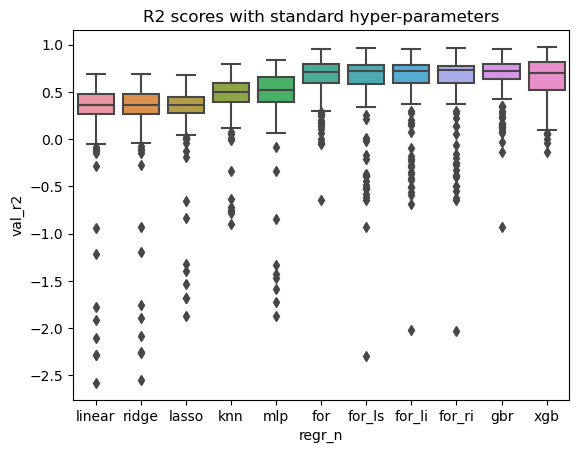

In [56]:
ax = sns.boxplot(x="regr_n", y="test_r2", data=gr_df)
plt.title('R2 scores with standard hyper-parameters')
plt.ylabel('val_r2')
plt.show()

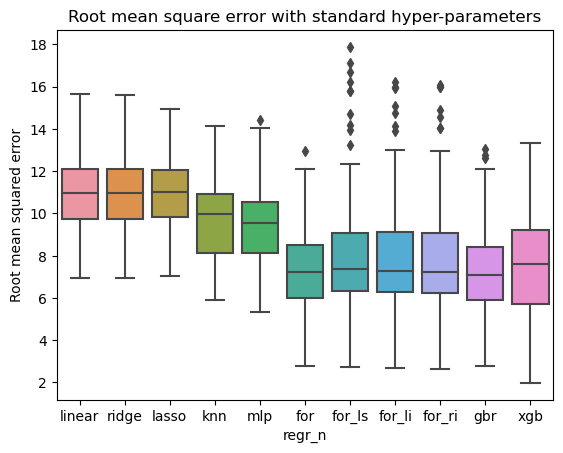

In [57]:
ax = sns.boxplot(x=gr_df["regr_n"], y=-gr_df["test_neg_root_mean_squared_error"])
plt.title('Root mean square error with standard hyper-parameters')
plt.ylabel('Root mean squared error')
plt.show()

In [107]:
cv_results = []

for rs in r_states:
    models = [
        
        ("for", 7, RandomForestRegressor(random_state=rs), {
            "n_estimators": [400, 1000, 2000, 4000],
            "max_features": [None],
            "max_depth": [5, 10, 50, 100, None],
        }),
        
        ("gbr", 7, GradientBoostingRegressor(random_state=rs), {
            "n_estimators": [400, 800, 1000, 2000, 4000],
            "learning_rate": np.linspace(.0005, 1, 50),
            "subsample": [0.1, 0.25, 0.5, 0.75, 1.0],
            "max_depth": [5, 10, 50, 100, None],
        }),
       
        ("xgb", 7, XGBRegressor(random_state=rs), {
            "n_estimators": [400, 800, 1000, 2000, 4000],
            "learning_rate": np.linspace(.0005, 1, 50),
            "subsample": [0.1, 0.25, 0.5, 0.75, 1.0],
            "max_depth": [5, 10, 50, 100, None],
        }),
    ]
    for regr_n, folds, regr, parameters in models:
        # Get the dataset
        X_train, y_train, X_test, y_test = get_dataset(data, rs=rs)
        # Find best parameters for model
        kf = KFold(folds, shuffle=True, random_state=rs)
        cv = GridSearchCV(regr, parameters, verbose=1, refit="r2", n_jobs=-1, cv=kf, scoring=scoring)
        cv.fit(X_train, y_train)
        # Get predicted values
        y_pred = cv.best_estimator_.predict(X_test)
        # Save score of model for future reference
        cv_results.append({
            "regr_n": regr_n,
            "random_state": rs,
            "best": cv.best_estimator_,
            "best_params": cv.best_params_,
            "best_score": cv.best_score_,
            "mape": mean_absolute_percentage_error(y_test, y_pred),
            "mae": mean_absolute_error(y_test, y_pred),
            "mse": mean_squared_error(y_test, y_pred),
            "rmse": mean_squared_error(y_test, y_pred, squared=False),            
            "r2": r2_score(y_test, y_pred),
        })
        print(cv_results[-1]['mape'], cv_results[-1]['r2'], cv_results[-1]['best_score'])

# Final results
len(cv_results)

Fitting 7 folds for each of 20 candidates, totalling 140 fits
0.2980113015211964 0.6574286986802609 0.709498727118943
Fitting 7 folds for each of 6250 candidates, totalling 43750 fits


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:978: RuntimeWarning: overflow encountered in square
  (array - array_means[:, np.newaxis]) ** 2, axis=1, weights=weights
C:\Users\Asus\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [-159.87119555 -155.62127016 -152.59258417 ... -393.7107815  -139.55104499
 -101.05644582]
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:978: RuntimeWarning: invalid value encountered in subtract
  (array - array_means[:, np.newaxis]) ** 2, axis=1, weights=weights
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [-12.60813027 -12.44116653

0.2809564476366974 0.6981341214573953 0.7536661018506895
Fitting 7 folds for each of 6250 candidates, totalling 43750 fits
0.2619841416486356 0.6873500593600361 0.7455930781958852


3

In [108]:
cv_df = pd.DataFrame(cv_results)
cv_df.groupby('regr_n')['best_score'].mean().sort_values(ascending=False)

regr_n
gbr    0.753666
xgb    0.745593
for    0.709499
Name: best_score, dtype: float64

In [163]:
# cv_df

In [110]:
best = cv_df.sort_values(by='best_score', ascending=False)['best'].head(1).values[0]
best

GradientBoostingRegressor(learning_rate=0.04129591836734694, max_depth=5,
                          n_estimators=4000, random_state=1, subsample=0.5)

In [111]:
best_params_gb = cv_df.sort_values(by='best_score', ascending=False)['best_params'].head(1).values[0]
best_params_gb

{'learning_rate': 0.04129591836734694,
 'max_depth': 5,
 'n_estimators': 4000,
 'subsample': 0.5}

In [112]:
second_best = cv_df.sort_values(by='best_score', ascending=False)['best'].head(2).values[1]
second_best

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.02089795918367347,
             max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=4000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=1, ...)

In [113]:
best_params_xgb = cv_df.sort_values(by='best_score', ascending=False)['best_params'].head(2).values[1]
best_params_xgb

{'learning_rate': 0.02089795918367347,
 'max_depth': 5,
 'n_estimators': 4000,
 'subsample': 0.75}

In [114]:
third_best = cv_df.sort_values(by='best_score', ascending=False)['best'].head(3).values[2]
third_best

RandomForestRegressor(max_depth=50, max_features=None, n_estimators=1000,
                      random_state=1)

In [79]:
best_params_rf = cv_df.sort_values(by='best_score', ascending=False)['best_params'].head(3).values[2]
best_params_rf

{'max_depth': 50, 'max_features': None, 'n_estimators': 1000}

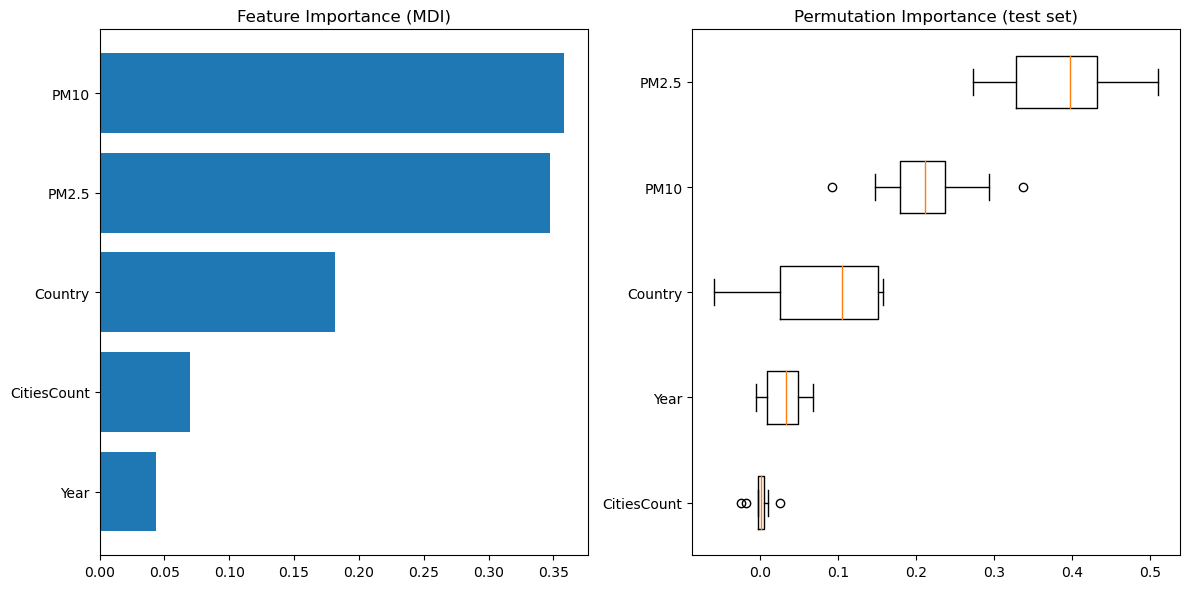

In [118]:
feature_importance = best.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(data.columns.values)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(best, X_test, y_test, n_repeats=10, random_state=1, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(data.columns.values)[sorted_idx],)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

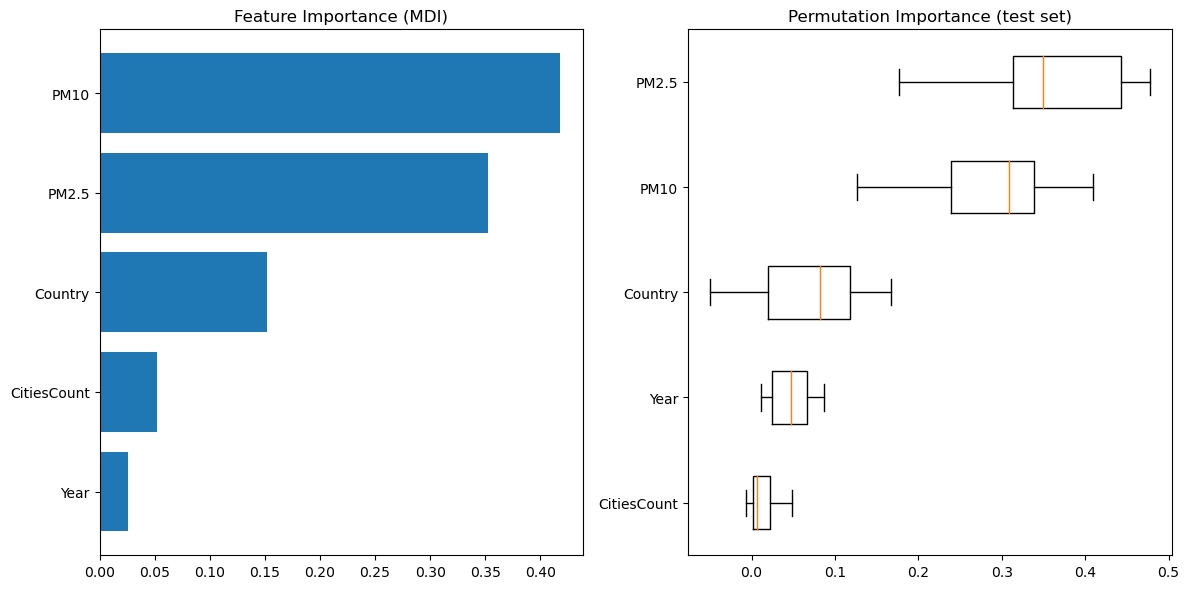

In [119]:
feature_importance = third_best.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(data.columns.values)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(third_best, X_test, y_test, n_repeats=10, random_state=1, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(data.columns.values)[sorted_idx],)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

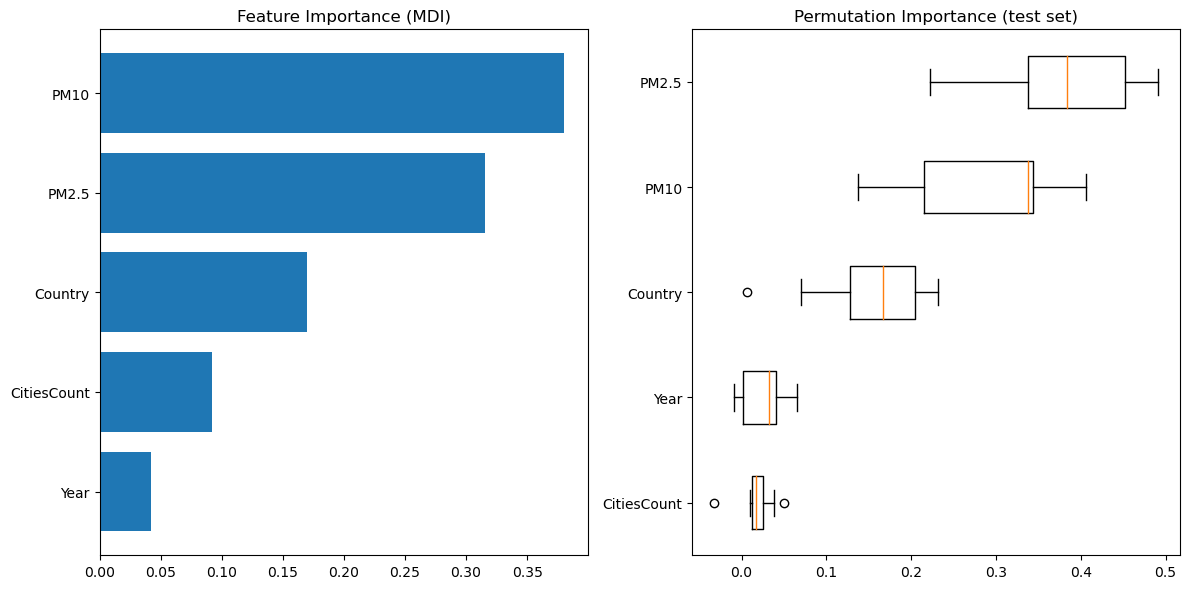

In [120]:
feature_importance = second_best.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(data.columns.values)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(second_best, X_test, y_test, n_repeats=10, random_state=1, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(data.columns.values)[sorted_idx],)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

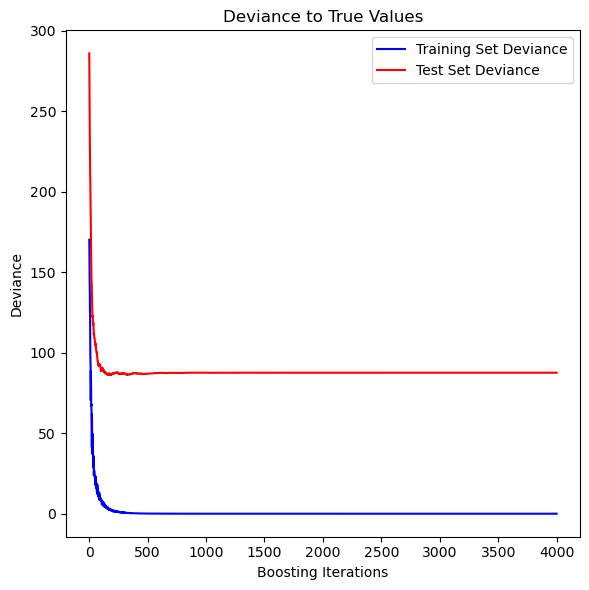

In [121]:
test_score = np.zeros((len(best.estimators_),), dtype=np.float64)
for i, y_pred in enumerate(best.staged_predict(X_test)):
    test_score[i] = best.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance to True Values")
plt.plot(
    np.arange(len(best.estimators_)) + 1,
    best.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(len(best.estimators_)) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

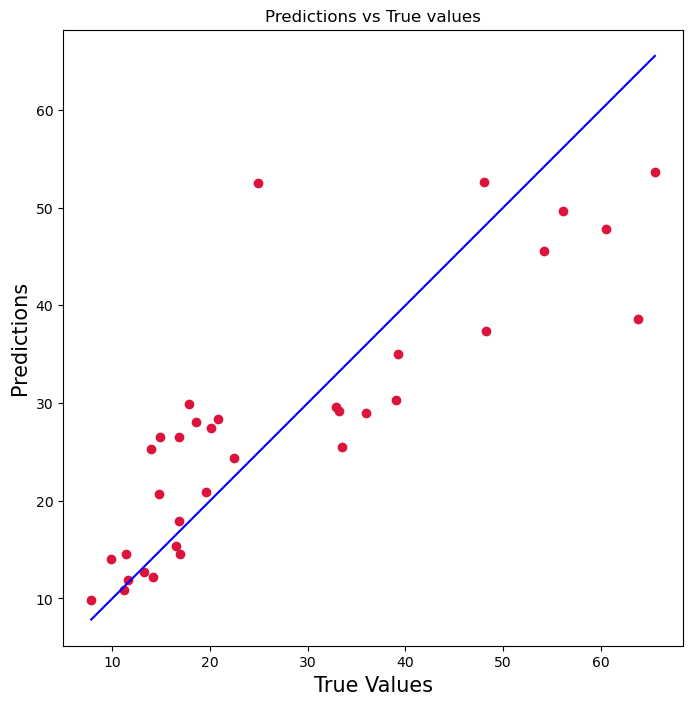

In [124]:
_, _, X_test, y_test = get_dataset(data, rs=rs)
y_pred = best.predict(X_test)

plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred, c='crimson')
#plt.yscale('log')
#plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.title("Predictions vs True values")
plt.show()

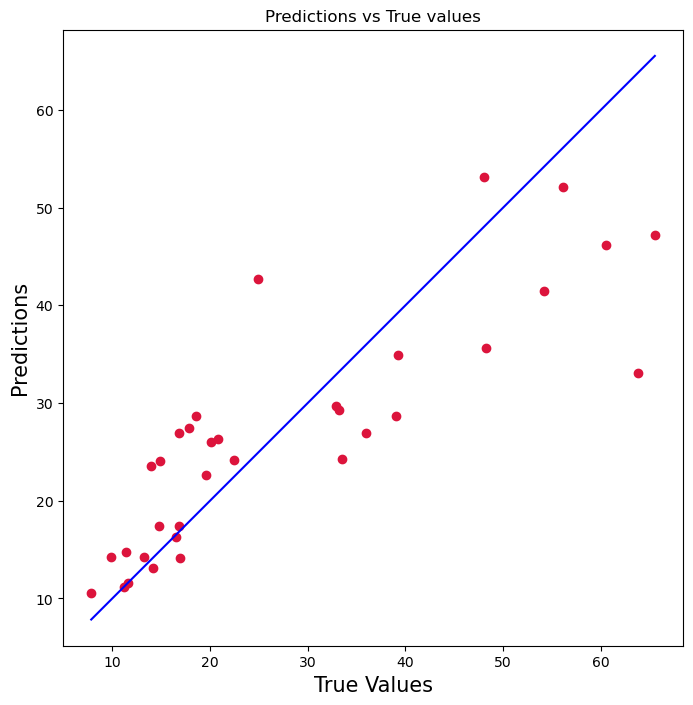

In [125]:
_,_, X_test, y_test = get_dataset(data, rs=rs)
y_pred = second_best.predict(X_test)

plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred, c='crimson')
#plt.yscale('log')
#plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.title("Predictions vs True values")
plt.show()

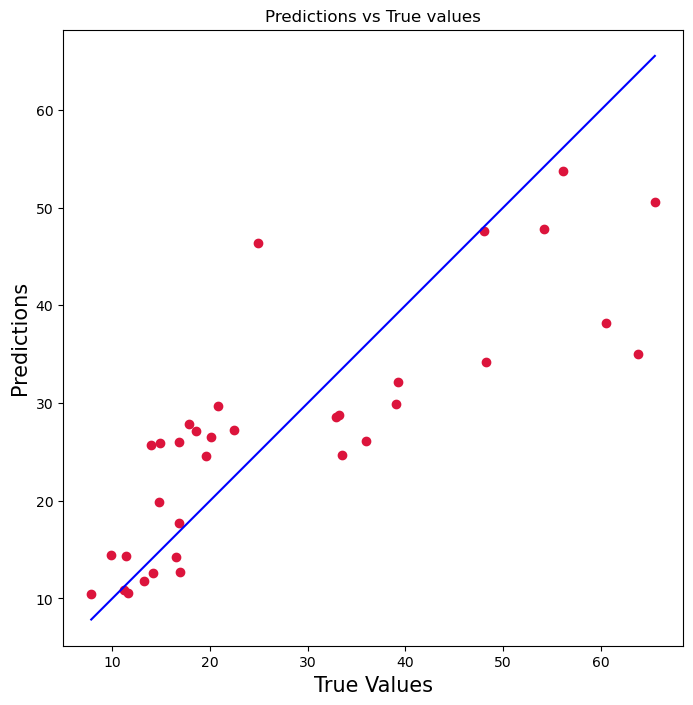

In [127]:
_, _, X_test, y_test = get_dataset(data, rs=rs)
y_pred = third_best.predict(X_test)

plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred, c='crimson')
#plt.yscale('log')
#plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.title("Predictions vs True values")
plt.show()

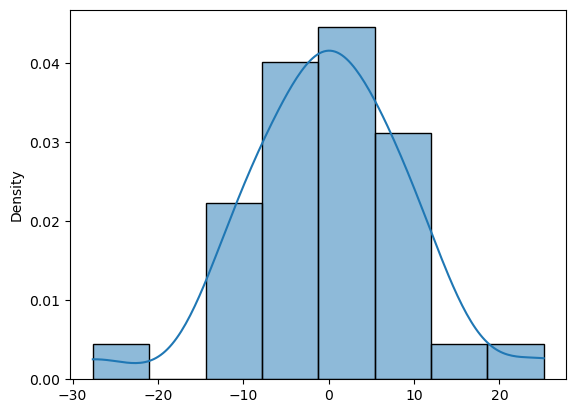

In [153]:
# sns.distplot(y_test-(best.predict(X_test)))
# plt.xlabel('y_test - y_predicted')
# plt.show()

sns.histplot((y_test-(best.predict(X_test))), kde=True, stat="density")
plt.show()

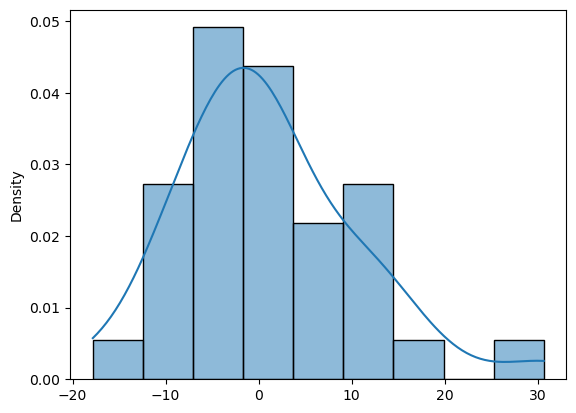

In [154]:
sns.histplot((y_test-(second_best.predict(X_test))), kde=True, stat="density")
plt.show()

# sns.distplot(y_test-(second_best.predict(X_test)))
# plt.xlabel('y_test - y_predicted')
# plt.show()


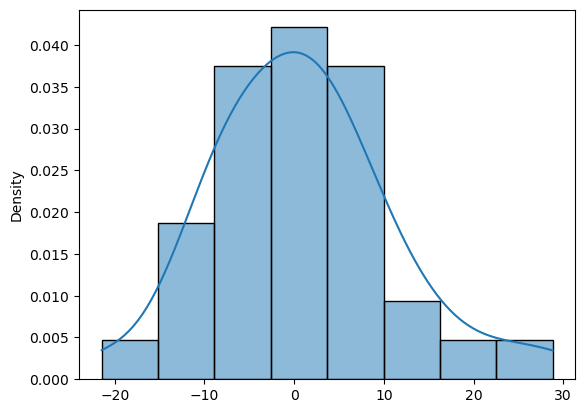

In [155]:
# sns.distplot(y_test-(third_best.predict(X_test)))
# plt.xlabel('y_test - y_predicted')
# plt.show()

sns.histplot((y_test-(third_best.predict(X_test))), kde=True, stat="density")
plt.show()
